In [2]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up data frame
col = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 
    'grade of spondylolisthesis','diagnosis']
df2 = pd.read_csv('column_2C.dat',sep = ' ', header = None, usecols = [0,1,2,3,4,5,6])
df2.columns = col

/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Printing correlation coefficents between two variables... 


pelvic incidence vs. pelvic tilt:  0.629185830901092
pelvic incidence vs. lumbar lordosis angle :  0.7172856697006664
pelvic incidence vs. sacral score:  0.8149586721890733
pelvic incidence vs. pelvic radius:  -0.24748402614988474
pelvic incidence vs. grade of spondylolisthesis:  0.6387325285350413
pelvic tilt vs. lumbar lordosis angle:  0.43276036442879495
pelvic tilt vs. sacral slope:  0.06232650849897834
pelvic tilt vs. pelvic radius:  0.032660264743413416
pelvic tilt vs. grade of spondylolisthesis:  0.39783985943964
lumbar lordosis angle vs. sacral slope:  0.5983888161605427
lumbar lordosis angle vs. pelvic radius:  -0.08036768473707571
lumbar lordosis angle vs. grade of spondylolisthesis:  0.5336649722212939
sacral slope vs. pelvic radius:  -0.3421465019669476
sacral slope vs. grade of spondylolisthesis:  0.5235714014128764
pelvic radius vs. grade of spondylolisthesis:  -0.026073310576548887


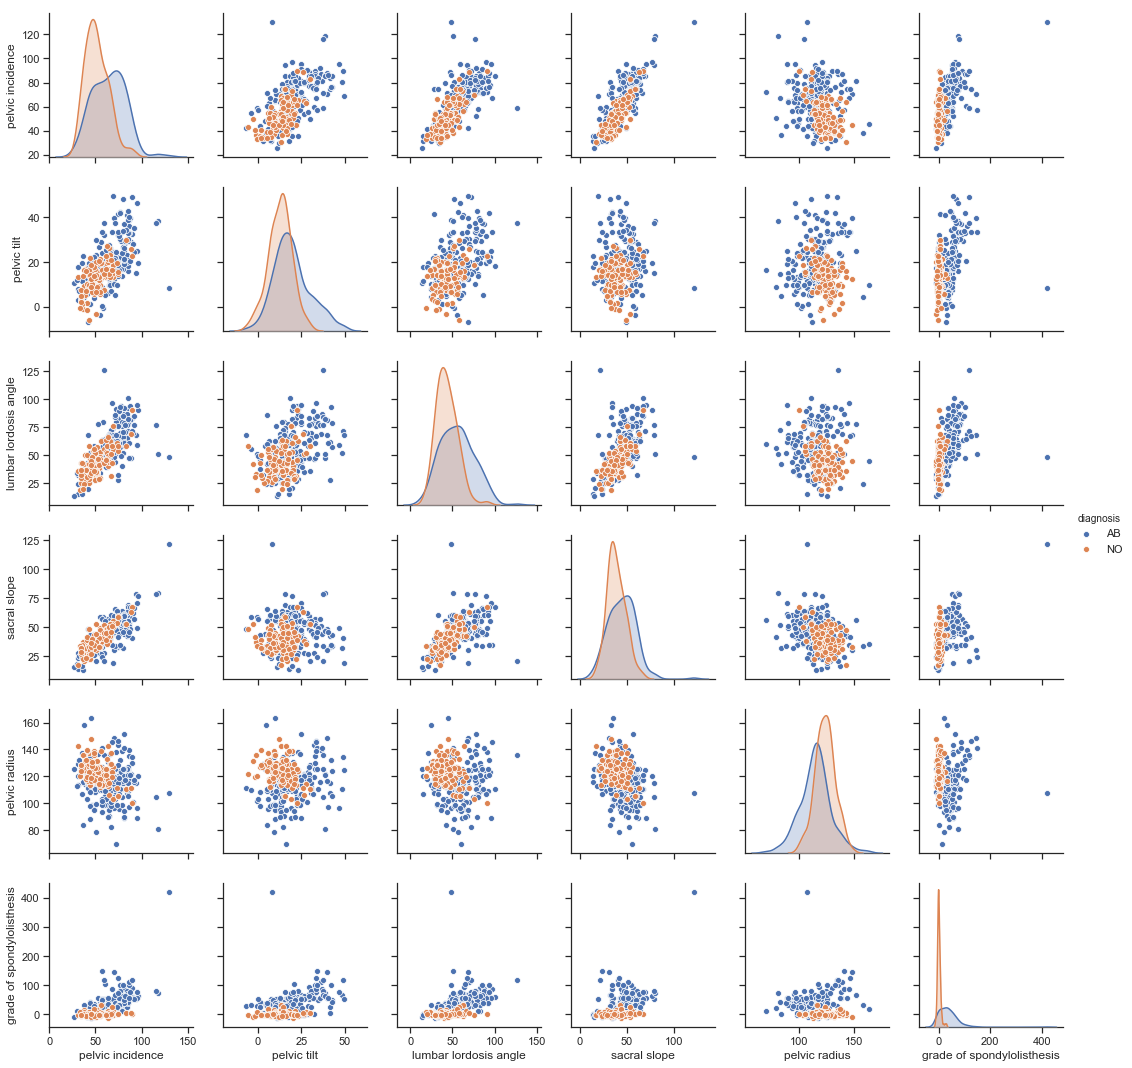

In [33]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set()
sns.set(style="ticks")
a=sns.pairplot(df2,hue="diagnosis")
a.savefig('scatter.png')

# Calculate Correlation Coefficeints between two variables
print('Printing correlation coefficents between two variables... \n\n')
print('pelvic incidence vs. pelvic tilt: ', np.corrcoef(df2['pelvic incidence'],df2['pelvic tilt'])[0][1])

print('pelvic incidence vs. lumbar lordosis angle : ' ,np.corrcoef(df2['pelvic incidence'],df2['lumbar lordosis angle'])[0][1])

print('pelvic incidence vs. sacral score: ' ,np.corrcoef(df2['pelvic incidence'],df2['sacral slope'] )[0][1])

print('pelvic incidence vs. pelvic radius: ', np.corrcoef(df2['pelvic incidence'],df2['pelvic radius'])[0][1])

print('pelvic incidence vs. grade of spondylolisthesis: ', np.corrcoef(df2['pelvic incidence'],df2['grade of spondylolisthesis'])[0][1])

print('pelvic tilt vs. lumbar lordosis angle: ', np.corrcoef(df2['pelvic tilt'],df2['lumbar lordosis angle'])[0][1])

print('pelvic tilt vs. sacral slope: ', np.corrcoef(df2['pelvic tilt'],df2['sacral slope'])[0][1])

print('pelvic tilt vs. pelvic radius: ', np.corrcoef(df2['pelvic tilt'],df2['pelvic radius'])[0][1])

print('pelvic tilt vs. grade of spondylolisthesis: ', np.corrcoef(df2['pelvic tilt'],df2['grade of spondylolisthesis'])[0][1])

print('lumbar lordosis angle vs. sacral slope: ',np.corrcoef(df2['lumbar lordosis angle'],df2['sacral slope'] )[0][1])

print('lumbar lordosis angle vs. pelvic radius: ', np.corrcoef(df2['lumbar lordosis angle'],df2['pelvic radius'])[0][1])

print('lumbar lordosis angle vs. grade of spondylolisthesis: ', np.corrcoef(df2['lumbar lordosis angle'],df2['grade of spondylolisthesis'])[0][1])

print('sacral slope vs. pelvic radius: ', np.corrcoef(df2['sacral slope'],df2['pelvic radius'])[0][1])

print('sacral slope vs. grade of spondylolisthesis: ',np.corrcoef(df2['sacral slope'],df2['grade of spondylolisthesis'])[0][1] )
print('pelvic radius vs. grade of spondylolisthesis: ', np.corrcoef(df2['pelvic radius'],df2['grade of spondylolisthesis'])[0][1])


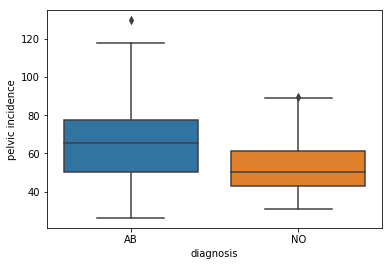

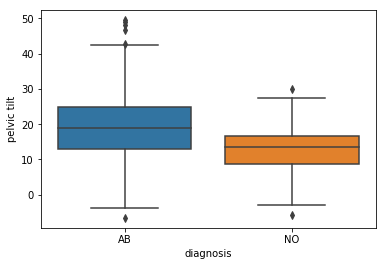

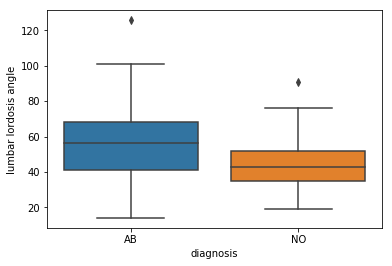

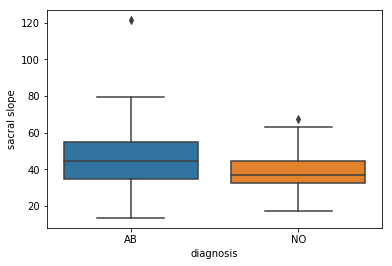

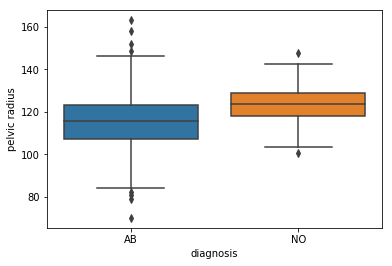

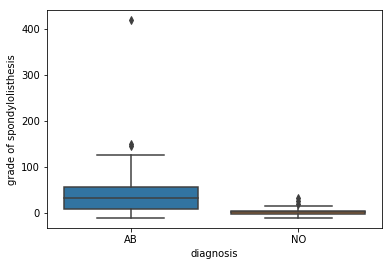

In [8]:
# b (ii) Boxplots
plt.figure()
a = sns.boxplot(x='diagnosis',y='pelvic incidence',data=df2)
plt.figure()
b = sns.boxplot(x='diagnosis',y='pelvic tilt',data=df2)
plt.figure()
c = sns.boxplot(x='diagnosis',y='lumbar lordosis angle',data=df2)
plt.figure()
d = sns.boxplot(x='diagnosis',y='sacral slope',data=df2)
plt.figure()
e = sns.boxplot(x='diagnosis',y='pelvic radius',data=df2)
plt.figure()
f = sns.boxplot(x='diagnosis',y='grade of spondylolisthesis',data=df2)

In [3]:
# b(iii) Select Test and train data sets
from sklearn import preprocessing
# Select train and test of class = 0/AB
ab = df2['diagnosis'] == 'AB'
dfab = df2[ab]

# Select train and test of class = 1/NO
no = df2['diagnosis'] == 'NO'
dfno = df2[no]

Xtrain = pd.concat([dfab.iloc[0:140,0:6],dfno.iloc[0:70,0:6]], ignore_index=True).values
Ytrain = preprocessing.LabelEncoder().fit_transform(np.ravel(pd.concat([dfab.iloc[0:140,-1:],dfno.iloc[0:70,-1:]], ignore_index=True)))

Xtest = pd.concat([dfab.iloc[140:,0:6],dfno.iloc[70:,0:6]], ignore_index=True).values
Ytest = preprocessing.LabelEncoder().fit_transform(np.ravel(pd.concat([dfab.iloc[140:,-1:],dfno.iloc[70:,-1:]], ignore_index=True)))

In [36]:
# c (i)
from sklearn.neighbors import KNeighborsClassifier,DistanceMetric
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

def KNN(k,Xtrain,Ytrain,Xtest,*p,**switch):
    if len(p) > 0 and p[0] == 1:
        print('using minkowski')
        knn = KNeighborsClassifier(n_neighbors = k,metric="minkowski")
        knn.fit(Xtrain,Ytrain)
    elif len(p)>0:
        print('Using user input for p')
        p = p[0]
        knn = KNeighborsClassifier(n_neighbors = k, metric=mydist, metric_params={"power": p})
        knn.fit(Xtrain,Ytrain)
    elif 'switch' in switch and switch['switch'] is True:
        print('Using chebyshev metric')
        knn = KNeighborsClassifier(n_neighbors = k, metric="chebyshev")
        knn.fit(Xtrain,Ytrain)
    elif 'switch' in switch and switch['switch'] is False:
        print('Using “mahalanobis” distance')
        knn = KNeighborsClassifier(n_neighbors = k, metric="mahalanobis",metric_params={'V': np.cov(Xtrain,rowvar=False)})
        knn.fit(Xtrain,Ytrain)
    else:
        print('using euclidean')
        knn = KNeighborsClassifier(n_neighbors = k,metric="euclidean")
        knn.fit(Xtrain,Ytrain)
            
    Ytrain_predict = knn.predict(Xtrain)
    Ytest_predict = knn.predict(Xtest)

    return Ytrain_predict, Ytest_predict

using euclidean
0.0
1
0.13
using euclidean
0.14761904761904765
4
0.12
using euclidean
0.1428571428571429
7
0.12
using euclidean
using euclidean
0.1428571428571429
13
0.12
using euclidean
0.14761904761904765
16
0.10999999999999999
k*=  16  testing error=  0.10999999999999999
Confusion matrix for k*=16: 
 [[70  0]
 [11 19]]
True Positive Rate:  0.6333333333333333
True Negative Rate:  1.0
Precision:  1.0
F-Score:  0.7755102040816326
using euclidean
0.14761904761904765
19
0.10999999999999999
using euclidean
0.12857142857142856
22
0.10999999999999999
using euclidean
0.13809523809523805
25
0.10999999999999999
using euclidean
using euclidean
0.14761904761904765
31
0.10999999999999999
using euclidean
using euclidean
0.1523809523809524
37
0.10999999999999999
using euclidean
using euclidean
using euclidean
using euclidean
0.16190476190476188
49
0.10999999999999999
k*=  49  testing error=  0.10999999999999999
Confusion matrix for k*=16: 
 [[69  1]
 [10 20]]
True Positive Rate:  0.6666666666666666

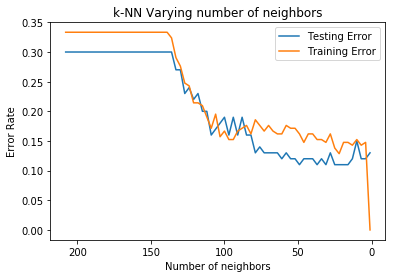

In [16]:
# c(ii)
neighbors = range(1,211,3)
train_err =[None] * len(neighbors)
test_err= [None] * len(neighbors)
min_k = 0
min_test = 1
for i,k in enumerate(neighbors):    
    Ytrain_predict,Ytest_predict = KNN(k,Xtrain,Ytrain,Xtest)    
    
    test_err[i] = 1- accuracy_score(Ytest,Ytest_predict)
    train_err[i] = 1 - accuracy_score(Ytrain,Ytrain_predict)
    
    # Find min k ... k* = 16
    if test_err[i] <= min_test:
        min_test = test_err[i]
        print(train_err[i])
        min_k = k
        print(min_k)
        print(min_test)
        if min_k == 16 or min_k == 49:
            print('k*= ', min_k,' testing error= ', min_test)
            conf = confusion_matrix(Ytest, Ytest_predict)
            print('Confusion matrix for k*=16: \n',conf)
            TP = conf[1][1]
            FP = conf[0][1]
            FN = conf[1][0]
            TN = conf[0][0]
            print('True Positive Rate: ', (TP/(TP+FN)))
            print('True Negative Rate: ', (TN/(TN+FP)))
            print('Precision: ', (TP/(TP+FP)))
            print('F-Score: ' , ((2*TP)/((2*TP) + FP + FN)))

# Plot error rates
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_err, label='Testing Error')
plt.plot(neighbors, train_err, label='Training Error')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.savefig('c_ii.png')

In [22]:
# Analyze test and train errors
train_avg = sum(train_err)/len(train_err)
test_avg = sum(test_err) / len(test_err)
print('Average training error: ', train_avg)
print('Average testing error: ', test_avg)


Average training error:  0.2284353741496601
Average testing error:  0.16224999999999998


In [17]:
def split_xtrain(N):
    x0 = int((N/3))
    x1 = int(N-x0)

    Xtrain = pd.concat([dfab.iloc[0:x1,0:6],dfno.iloc[0:x0,0:6]])
    Ytrain = preprocessing.LabelEncoder().fit_transform(np.ravel(pd.concat([dfab.iloc[0:x1,-1:],dfno.iloc[0:x0,-1:]])))

    return Xtrain, Ytrain

using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using euclidean
using eu

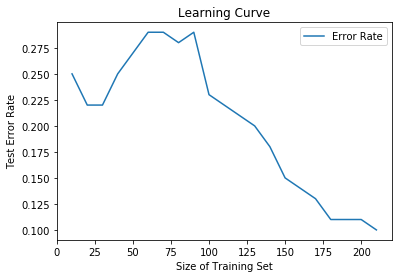

In [18]:
# b (iii)
neighbors = range(1,197,5)

test_acc= [None] * len(neighbors)
# training sample set sizes
n = np.arange(10,211,10)
min_test = np.empty(len(n))

for ind,N in enumerate(n):
    Xtrain, Ytrain = split_xtrain(N)
    m = 1
    for i,k in enumerate(neighbors):
        if k > N - 4:
              break
        Ytrain_predict,Ytest_predict = KNN(k,Xtrain,Ytrain,Xtest)
        
        test = 1 - accuracy_score(Ytest,Ytest_predict)
        
        if test < m:
            m = test
    min_test[ind] = m
print('Minimum for c(iii):' , min(min_test))    
plt.title('Learning Curve')
plt.plot(n, min_test, label='Error Rate')
plt.xlabel('Size of Training Set')
plt.ylabel('Test Error Rate')
plt.legend()
plt.savefig('c_iii.png')

In [9]:
def mydist(x, y, **kwargs):
    return np.sum((np.absolute(x-y))**kwargs["power"])**(1/float(kwargs["power"]))

In [37]:
# d (i) A and B
d = pd.DataFrame(columns = ['Metric','k*','Test Error'])
neighbors = range(1,197,5)
min_test = 1
min_k = 0
test_acc= 0

for i,k in enumerate(neighbors):
    Ytrain_predict,Ytest_predict = KNN(k,Xtrain,Ytrain,Xtest,1)
    
    test_acc = 1 - accuracy_score(Ytest,Ytest_predict)
    
    # Find  k*
    if test_acc < min_test:
        min_test = test_acc
        min_k = k
print('k*= ', min_k, ' for Minkowski')
print('Minkowski min test accuracy for k*:', min_test)

d = pd.DataFrame(columns = ['Metric','k*','Test Error'])
d = d.append({'Metric':"Minkowski", 'k*':min_k,'Test Error':min_test},ignore_index=True)
p = np.arange(0.1,1.1,0.1)

for i,pp in enumerate(p):
    Ytrain_predict,Ytest_predict = KNN(min_k,Xtrain,Ytrain,Xtest,pp)
    
    test_acc = 1 - accuracy_score(Ytest,Ytest_predict)

    metric = 'p = %f' % pp
    d = d.append({'Metric':metric, 'k*':min_k,'Test Error':test_acc},ignore_index=True)        


using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
using minkowski
k*=  21  for Minkowski
Minkowski min test accuracy for k*: 0.09999999999999998
Using user input for p
Using user input for p
Using user input for p
Using user input for p
Using user input for p
Using user input for p
Using user input for p
Using user input for p
Using user input for p
using minkowski


In [38]:
# d(i)C using cheby chev

neighbors = range(1,197,5)
min_test = 1
min_k = 0
for i,k in enumerate(neighbors):
    Ytrain_predict,Ytest_predict = KNN(k,Xtrain,Ytrain,Xtest, switch = True)
    cheby = 1 - accuracy_score(Ytest,Ytest_predict)
    if cheby < min_test:
        min_test = cheby
        min_k = k
        print(min_k)
d = d.append({'Metric':"Chebychev", 'k*':min_k,'Test Error':min_test},ignore_index=True)        

Using chebyshev metric
1
Using chebyshev metric
Using chebyshev metric
11
Using chebyshev metric
Using chebyshev metric
21
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric
Using chebyshev metric


In [39]:
# d(ii)
neighbors = range(1,197,5)
min_test = 1
min_k = 0
for i,k in enumerate(neighbors):
    Ytrain_predict,Ytest_predict = KNN(k,Xtrain,Ytrain,Xtest, switch = False)

    mahalanobis = 1 - accuracy_score(Ytest,Ytest_predict)
    
    if mahalanobis < min_test:
        min_test = mahalanobis
        min_k = k
        print(min_k)
d = d.append({'Metric':"Mahalanobis", 'k*':min_k,'Test Error':min_test},ignore_index=True)   
d

Using “mahalanobis” distance
1
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahalanobis” distance
Using “mahal

,Metric,k*,Test Error
0,Minkowski,21,0.10
1,p = 0.100000,21,0.16
2,p = 0.200000,21,0.15
3,p = 0.300000,21,0.14
4,p = 0.400000,21,0.12
5,p = 0.500000,21,0.12
6,p = 0.600000,21,0.13
7,p = 0.700000,21,0.13
8,p = 0.800000,21,0.12
9,p = 0.900000,21,0.12


In [21]:
def KNNe(Xtrain,Ytrain,Xtest,k,metr):
    knn = KNeighborsClassifier(n_neighbors = k,metric=metr,weights="distance")
        # Fit model
    knn.fit(Xtrain,Ytrain)
            
    Ytrain_predict = knn.predict(Xtrain)
    Ytest_predict = knn.predict(Xtest)
    
    return Ytest_predict

neighbors = range(1,197,5)
test_err = np.empty(len(neighbors))
distances = {"euclidean":None,"manhattan":None,"chebyshev":None}
min_errs = np.empty(len(distances))
for dist in distances:
    for i,k in enumerate(neighbors):
    
        Ytest_predict = KNNe(Xtrain,Ytrain,Xtest,k,dist)
        test_err[i] = 1 - accuracy_score(Ytest,Ytest_predict)
    distances[dist] = min(test_err)
            
de = pd.DataFrame.from_dict(distances,orient='index' )
de.columns = ['Test Error']
de

,Test Error
euclidean,0.10
manhattan,0.10
chebyshev,0.11
